In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import random
import matplotlib.pyplot as plt
import time

In [13]:
OpenFile = pd.read_csv('diabetes_prediction_dataset.csv')
FirstTen = OpenFile.head(5)
print(FirstTen)

   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  


In [14]:
# Display Information of our Data
CheckData = OpenFile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [15]:
# Check empty cells
CheckNull = OpenFile.isnull().sum()
print(CheckNull)

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [16]:
# Check Duplicates
ShowDuplicates = OpenFile.duplicated().sum()
print(ShowDuplicates)

3854


In [17]:
# Check items in Gender and Smove
count_gender = OpenFile.groupby('gender').size().reset_index(name='count')
count_smoker = OpenFile.groupby('smoking_history').size().reset_index(name='count')

print(count_gender)
print(count_smoker)

   gender  count
0  Female  58552
1    Male  41430
2   Other     18
  smoking_history  count
0         No Info  35816
1         current   9286
2            ever   4004
3          former   9352
4           never  35095
5     not current   6447


In [18]:
gender_mapping = {'Male': 0, 'Female': 1, 'Other': 2}
OpenFile['gender'] = OpenFile['gender'].map(gender_mapping)

print(OpenFile.head(5))

   gender   age  hypertension  heart_disease smoking_history    bmi  \
0       1  80.0             0              1           never  25.19   
1       1  54.0             0              0         No Info  27.32   
2       0  28.0             0              0           never  27.32   
3       1  36.0             0              0         current  23.45   
4       0  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  


In [20]:
deleteSmoke = OpenFile.drop(columns=['smoking_history'])
deleteGender = deleteSmoke.drop(columns=['gender'])
UpdatedFile = deleteGender

In [21]:
print(UpdatedFile.head(5))

    age  hypertension  heart_disease    bmi  HbA1c_level  blood_glucose_level  \
0  80.0             0              1  25.19          6.6                  140   
1  54.0             0              0  27.32          6.6                   80   
2  28.0             0              0  27.32          5.7                  158   
3  36.0             0              0  23.45          5.0                  155   
4  76.0             1              1  20.14          4.8                  155   

   diabetes  
0         0  
1         0  
2         0  
3         0  
4         0  


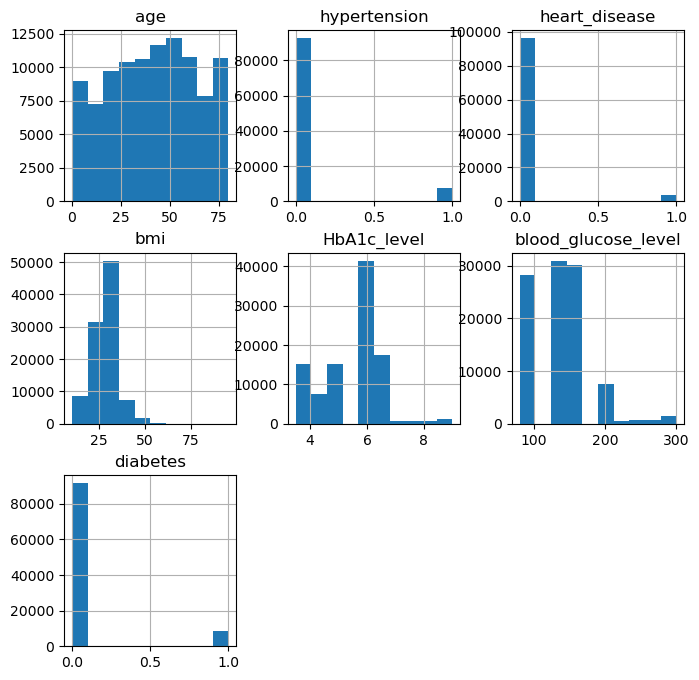

In [22]:
#histogram
UpdatedFile.hist(bins=10,figsize=(8,8))
plt.show()

<Axes: xlabel='diabetes', ylabel='count'>

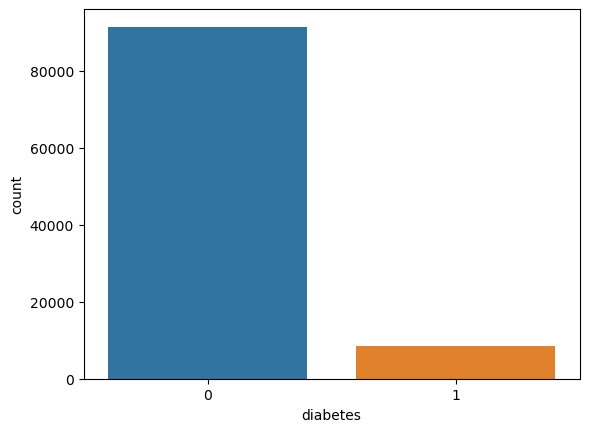

In [11]:
import seaborn as sns
# count patient with diabtes and with no diabetes
sns.countplot(x ='diabetes',data = UpdatedFile)